In [3]:
import pandas as pd
import numpy as np
from collections import Counter


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import warnings
warnings.filterwarnings("ignore")

In [4]:
london_listing_df = pd.read_csv('data/London_Listing_cleaned.csv')
london_listing_df = london_listing_df[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]


In [5]:
london_listing_df.fillna(0, inplace=True)
len(london_listing_df)

34595

In [6]:
price = london_listing_df['price']
prices=[]


In [8]:
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

In [9]:
london_listing_df['price']=prices


In [8]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
london_listing_df = london_listing_df[london_listing_df.bathrooms >0]
london_listing_df = london_listing_df[london_listing_df.bedrooms > 0]
london_listing_df = london_listing_df[london_listing_df.beds > 0]
london_listing_df = london_listing_df[london_listing_df.price  > 0]
london_listing_df = london_listing_df[london_listing_df.review_scores_rating  > 0]
london_listing_df = london_listing_df[london_listing_df.reviews_per_month > 0]
london_listing_df = london_listing_df[london_listing_df.accommodates  > 0]
london_listing_df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
1,31032917,Sophisticated 3 Bed apt w/Patio in Notting Hill,Welcome to my home in the heart of Notting Hil...,-0.19363,51.50970,Our beautiful and spacious flat is situated st...,Welcome to my home in the heart of Notting Hil...,f,Notting Hill is one of Londonâ€™s most excitin...,Kensington and Chelsea,...,Entire home/apt,6,2.0,3.0,3.0,0.73,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",moderate,11,198.0
2,31035061,"Smart 1BD Apartment, Moments From Covent Garden!","Right in the heart of central London, our bril...",-0.12094,51.51427,What To Expect: * Smart 1BD flat in the centr...,"Right in the heart of central London, our bril...",f,"High on every touristâ€™s visiting agenda, Cov...",Westminster,...,Entire home/apt,2,1.0,1.0,1.0,0.51,"{Kitchen,Heating,Washer,Dryer,""Smoke detector""...",strict_14_with_grace_period,8,130.0
3,31045053,Cosy East London Victorian Flat,Bright and quiet Victorian flat located in the...,-0.03679,51.53286,"Our place is a typical Victorian house, dating...",Bright and quiet Victorian flat located in the...,f,"Our home is located within a quiet street, jus...",Tower Hamlets,...,Entire home/apt,2,1.0,1.0,1.0,0.37,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",moderate,5,105.0
5,31070125,"Beautiful Apt near Nothing Hill Gate, London",This superb flat in Moorhouse Road is wonderfu...,-0.19892,51.51671,Beautiful first floor apartment features a bri...,This superb flat in Moorhouse Road is wonderfu...,t,Moorhouse Road is ideally positioned in a quie...,Westminster,...,Entire home/apt,3,1.0,2.0,2.0,0.83,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",flexible,13,150.0
6,31071260,"Professionally Managed 2 Bed apt, Angel station",Iâ€™m happy to invite you to my professionally...,-0.10888,51.53320,- The apartment is situated on the first floor...,Iâ€™m happy to invite you to my professionally...,f,Angel is a lively shopping and entertainment h...,Islington,...,Entire home/apt,5,1.5,2.0,3.0,1.33,"{TV,""Cable TV"",Wifi,Kitchen,Heating,Washer,""Sm...",flexible,19,80.0


In [9]:
roomType_df=london_listing_df.groupby('room_type').id.count()
roomType_df=roomType_df.reset_index()
roomType_df=roomType_df.rename(columns={'id':'number_Of_Listings'})
roomType_df

,room_type,number_Of_Listings
0,Entire home/apt,15492
1,Hotel room,344
2,Private room,9056
3,Shared room,121


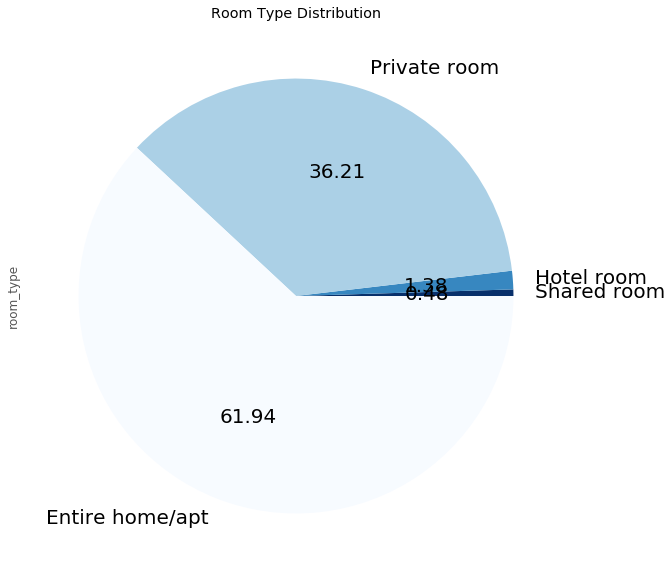

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = london_listing_df.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0, 0.5, 'Property Type')

Text(0, 0.5, 'Number of listings')

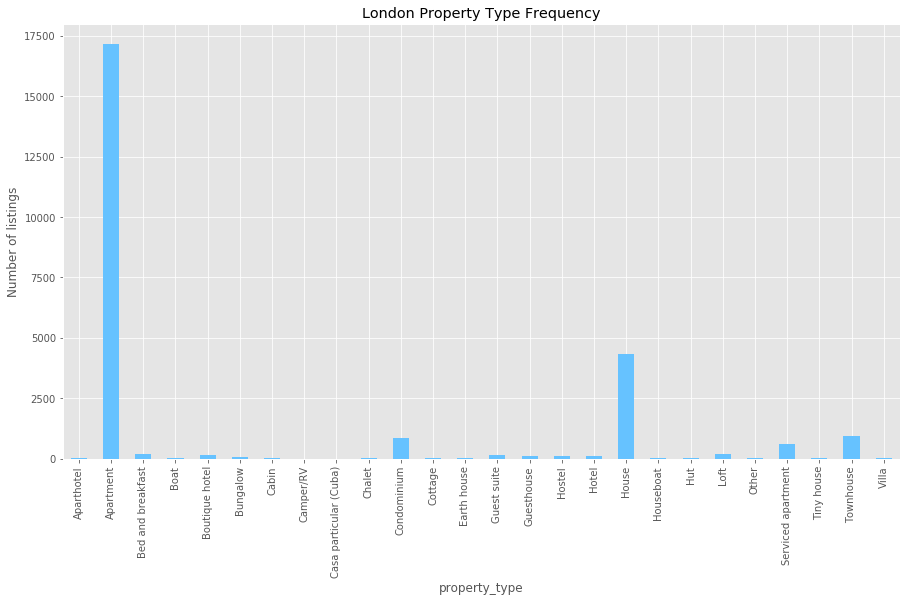

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_df = london_listing_df.groupby('property_type').id.count()
propertytype_df = propertytype_df.reset_index()
propertytype_df = propertytype_df.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_df['property_type']
y_pos = propertytype_df['Number_Of_Listings']

propertytype_df.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'London Property Type Frequency', 
           legend = False)
plt.ylabel('Property Type')
plt.ylabel('Number of listings')

In [12]:
london_listing_df.to_json("London_Listing.json")
len(london_listing_df)

25013

In [13]:
from sqlalchemy import create_engine
#Create sqlite Engine
db = create_engine('sqlite:///Airbnb.sqlite')

In [14]:
# Move the Warrick county data to UnemploymentData Table
london_listing_df.to_sql('London_listing', con=db, if_exists='append')
london_listing_df1 = pd.read_sql_query('SELECT * FROM London_listing',db)
london_listing_df1.head()

,index,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,1,31032917,Sophisticated 3 Bed apt w/Patio in Notting Hill,Welcome to my home in the heart of Notting Hil...,-0.19363,51.50970,Our beautiful and spacious flat is situated st...,Welcome to my home in the heart of Notting Hil...,f,Notting Hill is one of Londonâ€™s most excitin...,...,Entire home/apt,6,2.0,3.0,3.0,0.73,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",moderate,11,198.0
1,2,31035061,"Smart 1BD Apartment, Moments From Covent Garden!","Right in the heart of central London, our bril...",-0.12094,51.51427,What To Expect: * Smart 1BD flat in the centr...,"Right in the heart of central London, our bril...",f,"High on every touristâ€™s visiting agenda, Cov...",...,Entire home/apt,2,1.0,1.0,1.0,0.51,"{Kitchen,Heating,Washer,Dryer,""Smoke detector""...",strict_14_with_grace_period,8,130.0
2,3,31045053,Cosy East London Victorian Flat,Bright and quiet Victorian flat located in the...,-0.03679,51.53286,"Our place is a typical Victorian house, dating...",Bright and quiet Victorian flat located in the...,f,"Our home is located within a quiet street, jus...",...,Entire home/apt,2,1.0,1.0,1.0,0.37,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",moderate,5,105.0
3,5,31070125,"Beautiful Apt near Nothing Hill Gate, London",This superb flat in Moorhouse Road is wonderfu...,-0.19892,51.51671,Beautiful first floor apartment features a bri...,This superb flat in Moorhouse Road is wonderfu...,t,Moorhouse Road is ideally positioned in a quie...,...,Entire home/apt,3,1.0,2.0,2.0,0.83,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",flexible,13,150.0
4,6,31071260,"Professionally Managed 2 Bed apt, Angel station",Iâ€™m happy to invite you to my professionally...,-0.10888,51.53320,- The apartment is situated on the first floor...,Iâ€™m happy to invite you to my professionally...,f,Angel is a lively shopping and entertainment h...,...,Entire home/apt,5,1.5,2.0,3.0,1.33,"{TV,""Cable TV"",Wifi,Kitchen,Heating,Washer,""Sm...",flexible,19,80.0


In [15]:
len(london_listing_df1)

25013

In [16]:
roomProperty_df = london_listing_df.groupby(['property_type','room_type']).price.mean()
roomProperty_df = roomProperty_df.reset_index()
roomProperty_df = roomProperty_df.sort_values('price',ascending=[0])
roomProperty_df.head()

,property_type,room_type,price
34,Hostel,Hotel room,752.583333
12,Boutique hotel,Hotel room,657.031250
13,Boutique hotel,Private room,538.927083
57,Villa,Entire home/apt,404.500000
10,Boat,Entire home/apt,321.307692


In [18]:
pip install Donut

  Created wheel for Donut: filename=donut-0.2.2-cp37-none-any.whl size=3889 sha256=e8b59c157126448c6379d77f4f8ddbda86099dace5c69ce175510bf88111bffa
  Stored in directory: C:\Users\sumic\AppData\Local\pip\Cache\wheels\f7\a7\33\fb0a91a8f070cab4ea2329eda42fefd1339b7472c5f6c456b5
Successfully built Donut
Note: you may need to restart the kernel to use updated packages.


<Figure size 864x864 with 0 Axes>

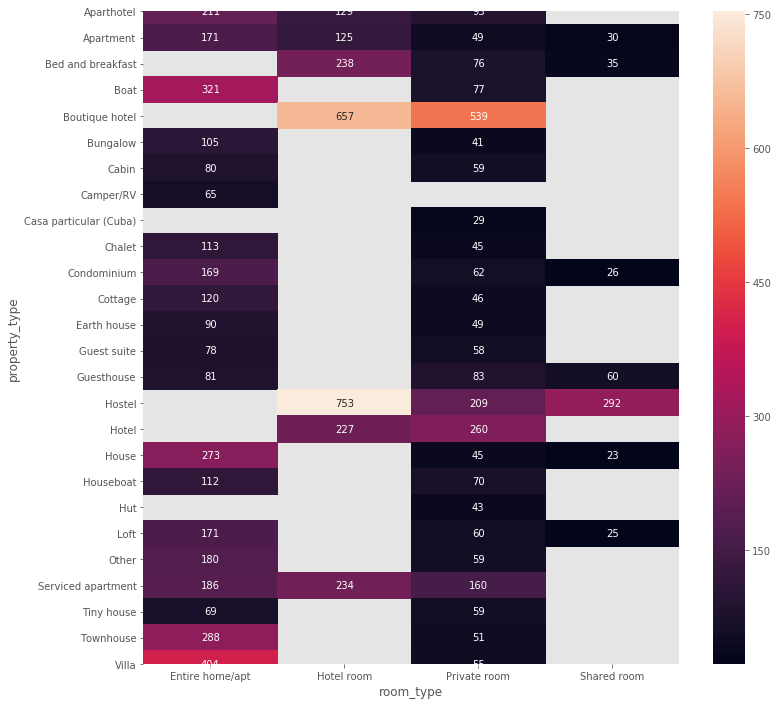

In [23]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(london_listing_df.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

<Figure size 864x864 with 0 Axes>

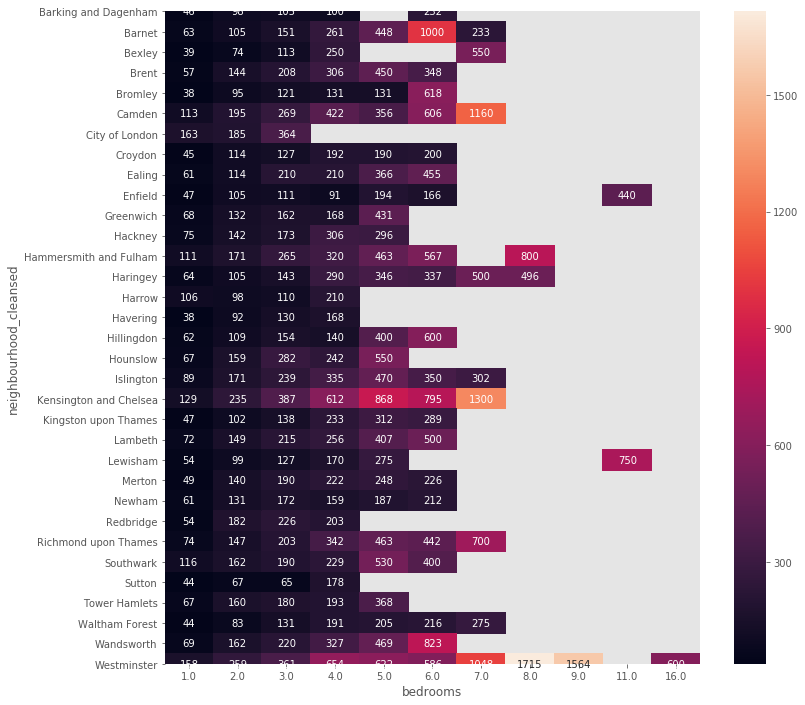

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(london_listing_df.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

In [25]:
summaryDF = london_listing_df[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
32602,"Modern Studio in Baker Street, This studio is ...",19985.0
4770,Our central London serviced apartments in Shaw...,10000.0
4764,Our central London serviced apartments in Shaw...,8000.0
4748,Our central London serviced apartments in Shaw...,7000.0
29803,Bedside power sockets provide a comfy nest for...,7000.0


In [30]:
#pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
#pip install STOPWORDS

  Created wheel for STOPWORDS: filename=stopwords-0.1.3-py2.py3-none-any.whl size=37293 sha256=52dbcc06f5c7275759f9ac7bb9e8036fa0f776ebbcbbc47a4b0179769fa38886
  Stored in directory: C:\Users\sumic\AppData\Local\pip\Cache\wheels\39\fa\c7\c4c5111e658f5c58465d948165dc3395a3c10ff57f4cd20356
Successfully built STOPWORDS
Note: you may need to restart the kernel to use updated packages.


In [35]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
words


"Modern Studio in Baker Street, This studio is modern and fully furnished,located on the second floor of a very characteristic building.Our central London serviced apartments in Shaw House are situated in the heart of Mayfair, providing easy access to all that Londonâ€™s fabulous West End has to offer. Shaw House itself is a period building. Itâ€™s undergone extensive refurbishment, and today it offers luxury accommodation for your stay in Mayfair that showcases all the traditional features of the propertyâ€™s past. This beautiful example of Londonâ€™s architecture is designed to make your stay in Mayfair calm and relaxingOur central London serviced apartments in Shaw House are situated in the heart of Mayfair, providing easy access to all that Londonâ€™s fabulous West End has to offer. Shaw House itself is a period building. Itâ€™s undergone extensive refurbishment, and today it offers luxury accommodation for your stay in Mayfair that showcases all the traditional features of the pro

<Figure size 1296x864 with 0 Axes>

(-0.5, 999.5, 699.5, -0.5)

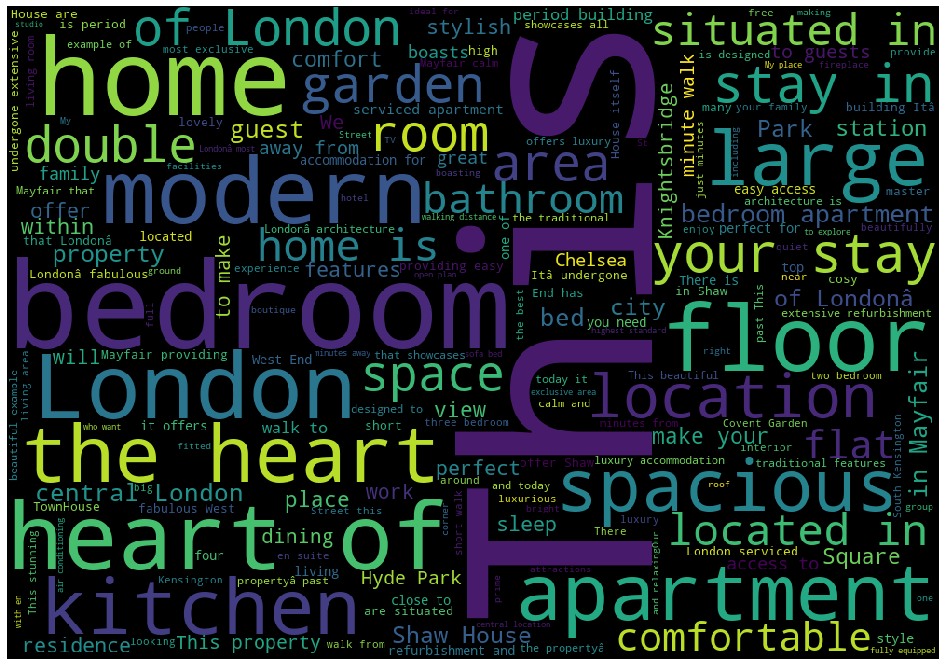

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()